In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

df = pd.read_csv("iot_telemetry_data.csv")

In [2]:
df.head()

,ts,device,co,humidity,light,lpg,motion,smoke,temp
0,1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000
1,1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001
2,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000
3,1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000
4,1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000


In [3]:
df = df.rename(columns={"ts": "Timestamp",
       "device": "Device",
       "co": "CO",
       "humidity": "Humidity",
       "light": "Light",
       "lpg": "LPG",
       "motion": "Motion",
       "smoke": "Smoke",
       "temp": "Temperature"})

In [4]:
df = df.sort_values(by='Device')
df['Device'].value_counts()

b8:27:eb:bf:9d:51    187451
00:0f:00:70:91:0a    111815
1c:bf:ce:15:ec:4d    105918
Name: Device, dtype: int64

In [5]:
df

,Timestamp,Device,CO,Humidity,Light,LPG,Motion,Smoke,Temperature
340833,1.595094e+09,00:0f:00:70:91:0a,0.003883,76.099998,False,0.006413,False,0.016905,19.100000
79692,1.594648e+09,00:0f:00:70:91:0a,0.003813,74.800003,False,0.006329,False,0.016669,19.600000
134742,1.594743e+09,00:0f:00:70:91:0a,0.004491,75.599998,False,0.007125,False,0.018915,19.299999
79690,1.594648e+09,00:0f:00:70:91:0a,0.003779,74.800003,False,0.006288,False,0.016552,19.500000
368241,1.595141e+09,00:0f:00:70:91:0a,0.002613,77.699997,False,0.004815,False,0.012445,19.799999
...,...,...,...,...,...,...,...,...,...
184514,1.594827e+09,b8:27:eb:bf:9d:51,0.005066,52.800000,False,0.007773,False,0.020761,22.700000
184516,1.594827e+09,b8:27:eb:bf:9d:51,0.005041,52.800000,False,0.007746,False,0.020682,22.700000
184519,1.594827e+09,b8:27:eb:bf:9d:51,0.005048,52.800000,False,0.007754,False,0.020705,22.700000
184489,1.594827e+09,b8:27:eb:bf:9d:51,0.005041,52.900000,False,0.007746,False,0.020682,22.700000


In [6]:
df_1 = df.iloc[ : 111815 , : ] 
df_2 = df.iloc[111815 : 111815 + 105918 , : ]
df_3 = df.iloc[111815 + 105918 : , : ]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405184 entries, 340833 to 405183
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Timestamp    405184 non-null  float64
 1   Device       405184 non-null  object 
 2   CO           405184 non-null  float64
 3   Humidity     405184 non-null  float64
 4   Light        405184 non-null  bool   
 5   LPG          405184 non-null  float64
 6   Motion       405184 non-null  bool   
 7   Smoke        405184 non-null  float64
 8   Temperature  405184 non-null  float64
dtypes: bool(2), float64(6), object(1)
memory usage: 25.5+ MB


In [8]:
cor_mat = df.corr()
cor_mat

,Timestamp,CO,Humidity,Light,LPG,Motion,Smoke,Temperature
Timestamp,1.000000,0.025757,0.017752,-0.020868,0.014178,-0.006911,0.016349,0.074443
CO,0.025757,1.000000,-0.656750,-0.230197,0.997331,-0.000706,0.998192,0.110905
Humidity,0.017752,-0.656750,1.000000,0.079703,-0.672113,-0.009826,-0.669863,-0.410427
Light,-0.020868,-0.230197,0.079703,1.000000,-0.208926,0.033594,-0.212969,0.747485
LPG,0.014178,0.997331,-0.672113,-0.208926,1.000000,0.000232,0.999916,0.136396
Motion,-0.006911,-0.000706,-0.009826,0.033594,0.000232,1.000000,0.000062,0.037649
Smoke,0.016349,0.998192,-0.669863,-0.212969,0.999916,0.000062,1.000000,0.131891
Temperature,0.074443,0.110905,-0.410427,0.747485,0.136396,0.037649,0.131891,1.000000


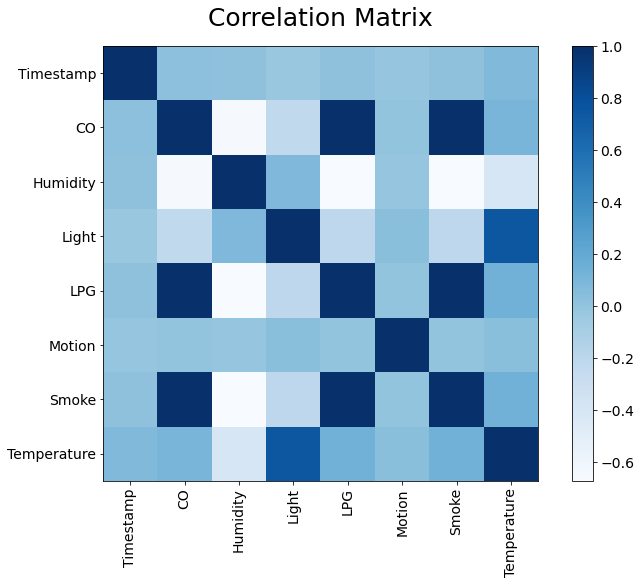

In [9]:
%matplotlib inline

fig = plt.figure(figsize=(12,8))
plt.imshow(cor_mat, cmap=plt.cm.Blues)
plt.xticks(range(cor_mat.shape[1]), cor_mat.columns, fontsize=14, rotation=90)
plt.yticks(range(cor_mat.shape[1]), cor_mat.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=25, pad=20)
plt.show()

In [10]:
df_list=[df_1, df_2, df_3]

df_1 = df_1.sort_values(by='Timestamp')    
df_2 = df_2.sort_values(by='Timestamp') 
df_3 = df_3.sort_values(by='Timestamp') 

In [11]:
df_1

,Timestamp,Device,CO,Humidity,Light,LPG,Motion,Smoke,Temperature
1,1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001
7,1.594512e+09,00:0f:00:70:91:0a,0.002938,76.000000,False,0.005241,False,0.013628,19.700001
15,1.594512e+09,00:0f:00:70:91:0a,0.002905,75.800003,False,0.005199,False,0.013509,19.700001
20,1.594512e+09,00:0f:00:70:91:0a,0.002938,75.800003,False,0.005241,False,0.013628,19.700001
23,1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001
...,...,...,...,...,...,...,...,...,...
405169,1.595203e+09,00:0f:00:70:91:0a,0.003745,75.300003,False,0.006247,False,0.016437,19.200001
405172,1.595203e+09,00:0f:00:70:91:0a,0.003745,75.400002,False,0.006247,False,0.016437,19.200001
405175,1.595203e+09,00:0f:00:70:91:0a,0.003745,75.400002,False,0.006247,False,0.016437,19.200001
405179,1.595203e+09,00:0f:00:70:91:0a,0.003745,75.300003,False,0.006247,False,0.016437,19.200001


In [12]:
df_2

,Timestamp,Device,CO,Humidity,Light,LPG,Motion,Smoke,Temperature
3,1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.0
5,1.594512e+09,1c:bf:ce:15:ec:4d,0.004391,77.900002,True,0.007009,False,0.018589,27.0
8,1.594512e+09,1c:bf:ce:15:ec:4d,0.004345,77.900002,True,0.006957,False,0.018440,27.0
11,1.594512e+09,1c:bf:ce:15:ec:4d,0.004383,78.000000,True,0.007000,False,0.018563,27.0
13,1.594512e+09,1c:bf:ce:15:ec:4d,0.004451,78.000000,True,0.007079,False,0.018786,27.0
...,...,...,...,...,...,...,...,...,...
405165,1.595203e+09,1c:bf:ce:15:ec:4d,0.004524,75.900002,True,0.007162,False,0.019021,26.6
405171,1.595203e+09,1c:bf:ce:15:ec:4d,0.004532,75.900002,True,0.007172,False,0.019049,26.6
405174,1.595203e+09,1c:bf:ce:15:ec:4d,0.004532,75.900002,True,0.007172,False,0.019049,26.6
405178,1.595203e+09,1c:bf:ce:15:ec:4d,0.004553,75.800003,True,0.007196,False,0.019117,26.6


In [13]:
for dframe in df_list:
    print(dframe.count())
    print("\n\n")

Timestamp      111815
Device         111815
CO             111815
Humidity       111815
Light          111815
LPG            111815
Motion         111815
Smoke          111815
Temperature    111815
dtype: int64



Timestamp      105918
Device         105918
CO             105918
Humidity       105918
Light          105918
LPG            105918
Motion         105918
Smoke          105918
Temperature    105918
dtype: int64



Timestamp      187451
Device         187451
CO             187451
Humidity       187451
Light          187451
LPG            187451
Motion         187451
Smoke          187451
Temperature    187451
dtype: int64





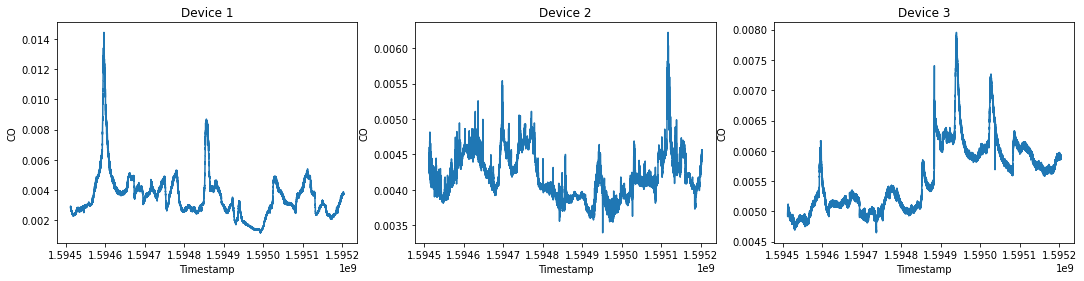

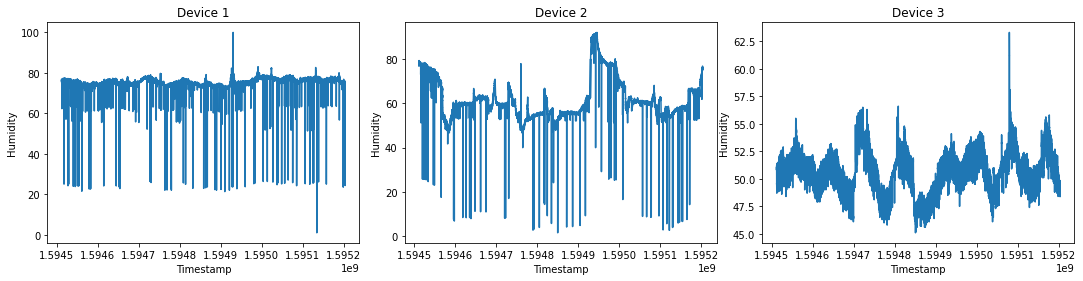

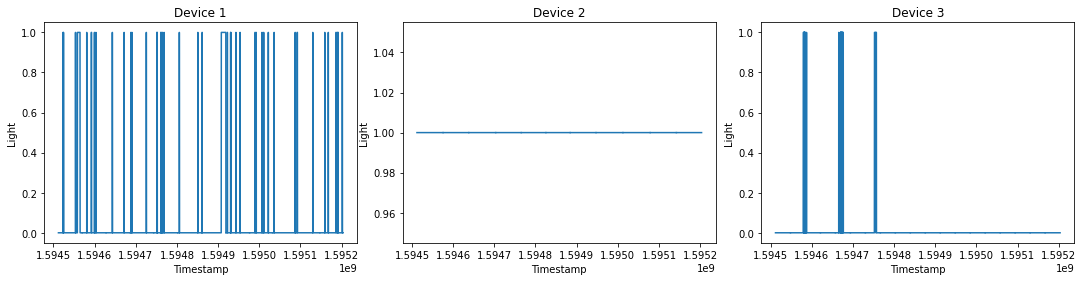

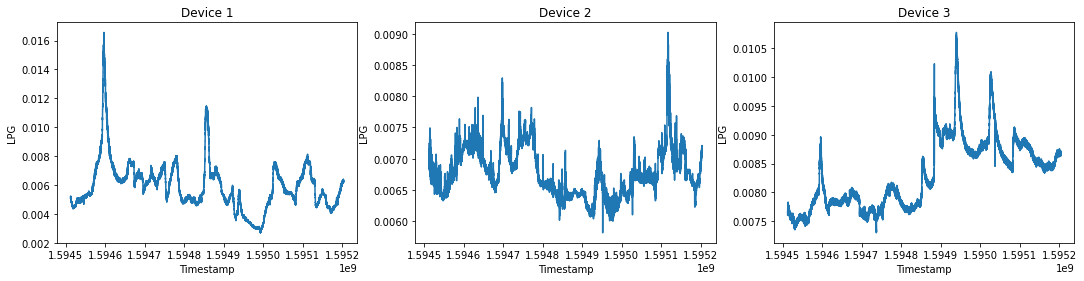

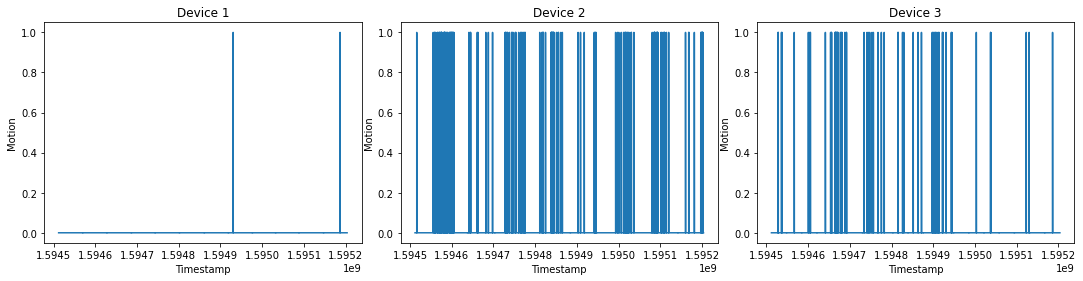

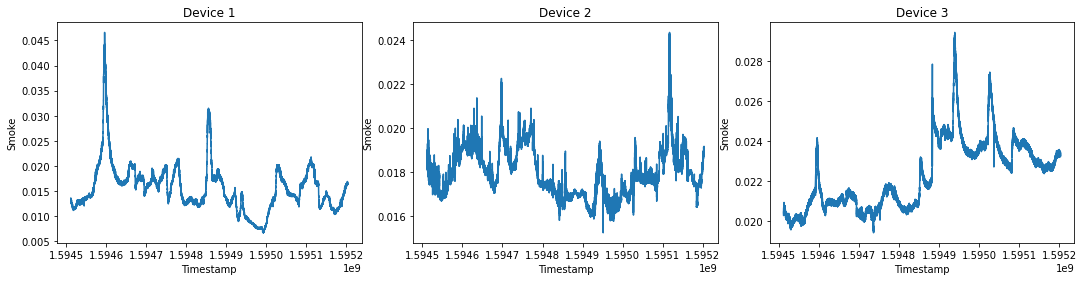

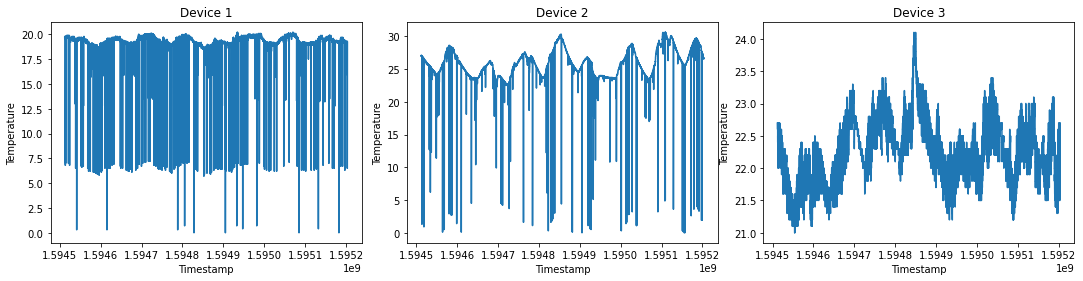

In [14]:
%matplotlib inline

labels=['CO', 'Humidity', 'Light', 'LPG', 'Motion', 'Smoke', 'Temperature']

def draw_plots(i):    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

    axes[0].plot(df_1[df_1.columns[0]], df_1[df_1.columns[i]])
    axes[0].set_title('Device 1')

    axes[1].plot(df_2[df_1.columns[0]], df_2[df_2.columns[i]])
    axes[1].set_title('Device 2')

    axes[2].plot(df_3[df_1.columns[0]], df_3[df_3.columns[i]])
    axes[2].set_title('Device 3')

    fig.tight_layout()

    for ax in axes.flat:
        ax.set(xlabel='Timestamp', ylabel=labels[i-2])
        
for i in range(2,9):
    draw_plots(i)            

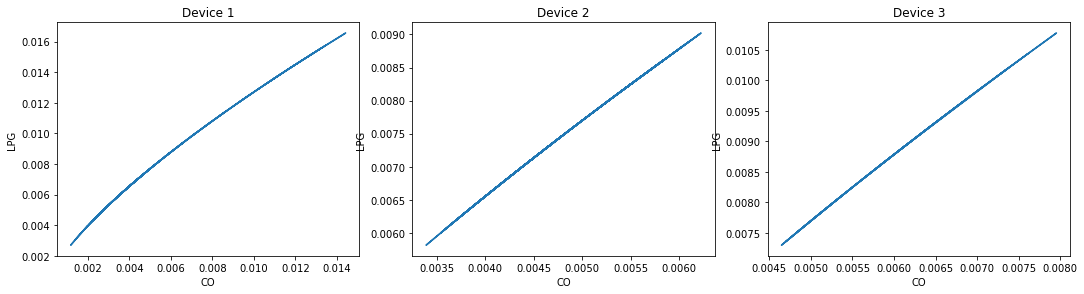

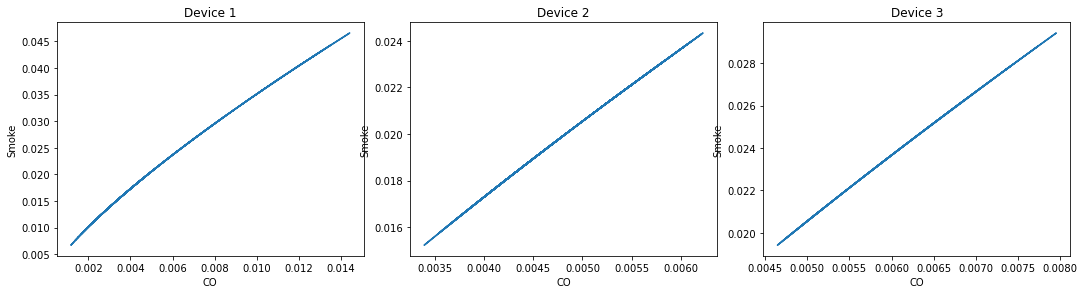

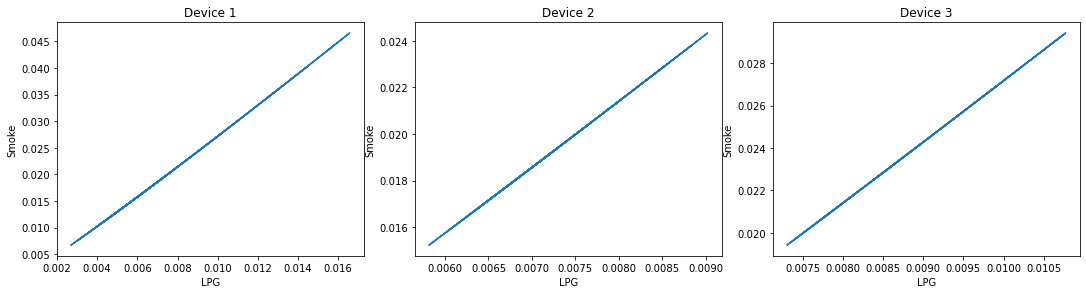

In [15]:
%matplotlib inline

comp_labels = [5,7]

def draw_comparison(i):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

    axes[0].plot(df_1[df_1.columns[2]], df_1[df_1.columns[i]])
    axes[0].set_title('Device 1')

    axes[1].plot(df_2[df_1.columns[2]], df_2[df_2.columns[i]])
    axes[1].set_title('Device 2')

    axes[2].plot(df_3[df_1.columns[2]], df_3[df_3.columns[i]])
    axes[2].set_title('Device 3')

    fig.tight_layout()

    for ax in axes.flat:
        ax.set(xlabel='CO', ylabel=str(df.columns[i]))
        
for i in comp_labels:
    draw_comparison(i)
    
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

axes[0].plot(df_1.LPG, df_1.Smoke)
axes[0].set_title('Device 1')

axes[1].plot(df_2.LPG, df_2.Smoke)
axes[1].set_title('Device 2')

axes[2].plot(df_3.LPG, df_3.Smoke)
axes[2].set_title('Device 3')

fig.tight_layout()

for ax in axes.flat:
    ax.set(xlabel='LPG', ylabel='Smoke')    

In [16]:
max_values=[]
min_values=[]

for i in range(2,9):
    max_values.append(df[df.columns[i]].max())
    min_values.append(df[df.columns[i]].min())
    
print(max_values)
print(min_values)    

[0.014420105304506959, 99.9000015258789, True, 0.016567377162503137, True, 0.04659011562630793, 30.60000038146973]
[0.0011705085484379088, 1.100000023841858, False, 0.002693478622661808, False, 0.006692096317386558, 0.0]


In [17]:
(df_2['Temperature']==0.0).sum()

3

In [18]:
df_1.describe()

,Timestamp,CO,Humidity,LPG,Smoke,Temperature
count,1.118150e+05,111815.000000,111815.000000,111815.000000,111815.000000,111815.000000
mean,1.594859e+09,0.003527,75.444361,0.005893,0.015489,19.362552
std,1.998610e+05,0.001479,1.975801,0.001700,0.004809,0.643786
min,1.594512e+09,0.001171,1.100000,0.002693,0.006692,0.000000
25%,1.594687e+09,0.002613,74.400002,0.004815,0.012445,19.100000
50%,1.594861e+09,0.003230,75.400002,0.005613,0.014662,19.400000
75%,1.595032e+09,0.004116,76.500000,0.006689,0.017682,19.700001
max,1.595203e+09,0.014420,99.900002,0.016567,0.046590,20.200001


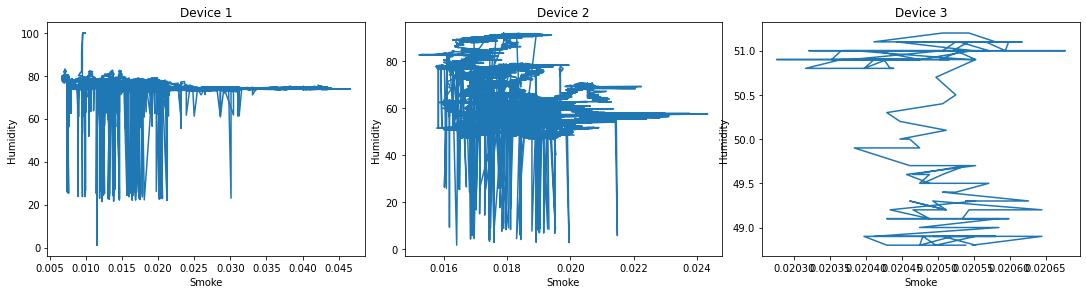

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

axes[0].plot(df_1.Smoke, df_1.Humidity)
axes[0].set_title('Device 1')

axes[1].plot(df_2.Smoke, df_2.Humidity)
axes[1].set_title('Device 2')

axes[2].plot(df_3[:200].Smoke, df_3[:200].Humidity)
axes[2].set_title('Device 3')

fig.tight_layout()

for ax in axes.flat:
    ax.set(ylabel='Humidity', xlabel='Smoke')

In [20]:
df_1.drop(df_1[df_1['Temperature'] == 0.0].index, inplace = True)
df_2.drop(df_2[df_2['Temperature'] == 0.0].index, inplace = True)
df_3.drop(df_3[df_3['Temperature'] == 0.0].index, inplace = True)  

In [21]:
df_1.describe()

,Timestamp,CO,Humidity,LPG,Smoke,Temperature
count,1.118110e+05,111811.000000,111811.000000,111811.000000,111811.000000,111811.000000
mean,1.594859e+09,0.003527,75.444547,0.005893,0.015489,19.363245
std,1.998610e+05,0.001479,1.975463,0.001700,0.004809,0.633295
min,1.594512e+09,0.001171,1.100000,0.002693,0.006692,0.300000
25%,1.594687e+09,0.002613,74.400002,0.004815,0.012445,19.100000
50%,1.594861e+09,0.003230,75.400002,0.005613,0.014662,19.400000
75%,1.595032e+09,0.004116,76.500000,0.006689,0.017682,19.700001
max,1.595203e+09,0.014420,99.900002,0.016567,0.046590,20.200001


In [22]:
df_2.describe()

,Timestamp,CO,Humidity,LPG,Smoke,Temperature
count,1.059150e+05,105915.000000,105915.000000,105915.000000,105915.000000,105915.000000
mean,1.594857e+09,0.004183,61.910369,0.006764,0.017895,26.026248
std,1.989757e+05,0.000320,8.944889,0.000373,0.001055,2.021716
min,1.594512e+09,0.003391,1.600000,0.005814,0.015224,0.100000
25%,1.594687e+09,0.003931,55.599998,0.006470,0.017064,24.299999
50%,1.594855e+09,0.004089,59.599998,0.006657,0.017592,25.900000
75%,1.595029e+09,0.004391,65.300003,0.007009,0.018589,27.299999
max,1.595203e+09,0.006224,92.000000,0.009022,0.024341,30.600000


In [23]:
df_3.describe()

,Timestamp,CO,Humidity,LPG,Smoke,Temperature
count,1.874510e+05,187451.000000,187451.000000,187451.000000,187451.000000,187451.000000
mean,1.594858e+09,0.005560,50.814077,0.008306,0.022288,22.279969
std,1.995733e+05,0.000559,1.888926,0.000599,0.001720,0.481902
min,1.594512e+09,0.004646,45.100000,0.007301,0.019416,21.000000
25%,1.594685e+09,0.005079,49.600000,0.007788,0.020803,21.900000
50%,1.594858e+09,0.005439,50.900000,0.008183,0.021931,22.300000
75%,1.595031e+09,0.005993,52.100000,0.008778,0.023640,22.600000
max,1.595203e+09,0.007955,63.300000,0.010774,0.029422,24.100000


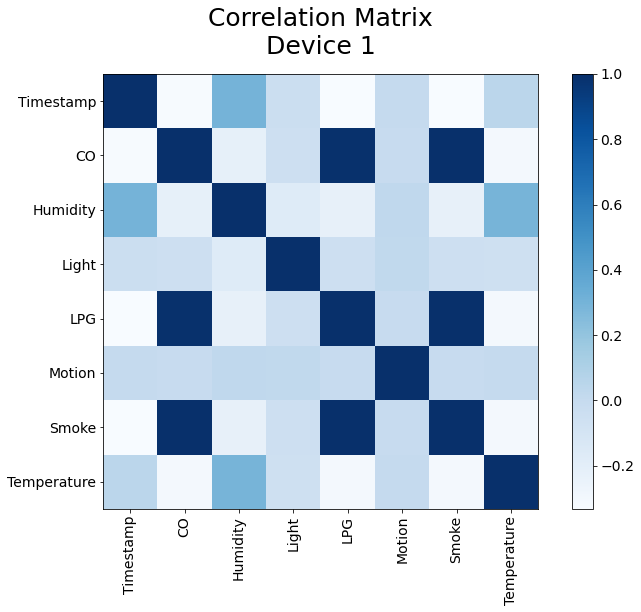

In [24]:
%matplotlib inline

fig = plt.figure(figsize=(12,8))
plt.imshow(df_1.corr(), cmap=plt.cm.Blues)
plt.xticks(range(df_1.corr().shape[1]), df_1.corr().columns, fontsize=14, rotation=90)
plt.yticks(range(df_1.corr().shape[1]), df_1.corr().columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix\nDevice 1', fontsize=25, pad=20)
plt.show()

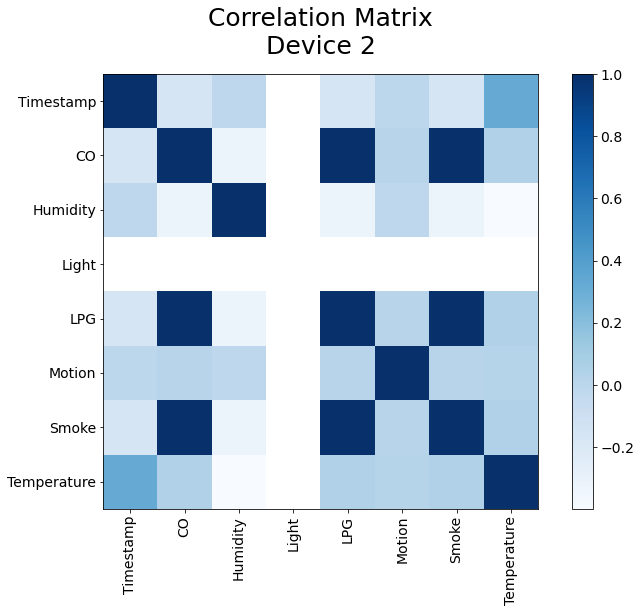

In [25]:
%matplotlib inline

fig = plt.figure(figsize=(12,8))
plt.imshow(df_2.corr(), cmap=plt.cm.Blues)
plt.xticks(range(df_2.corr().shape[1]), df_2.corr().columns, fontsize=14, rotation=90)
plt.yticks(range(df_2.corr().shape[1]), df_2.corr().columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix\nDevice 2', fontsize=25, pad=20)
plt.show()

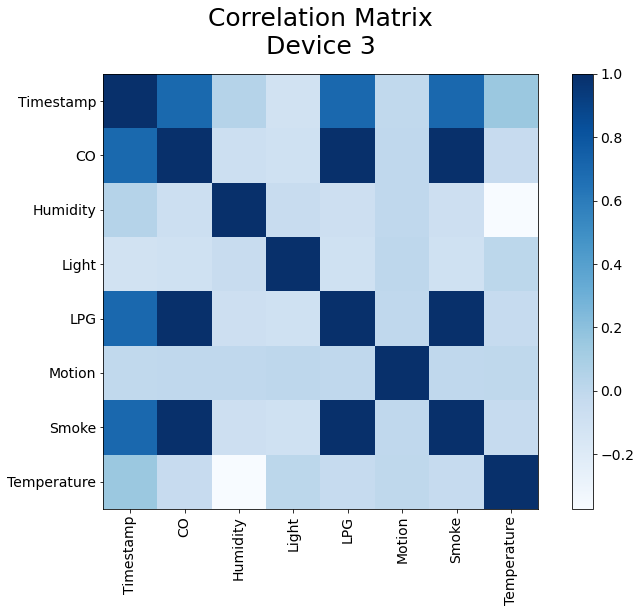

In [26]:
%matplotlib inline

fig = plt.figure(figsize=(12,8))
plt.imshow(df_3.corr(), cmap=plt.cm.Blues)
plt.xticks(range(df_3.corr().shape[1]), df_3.corr().columns, fontsize=14, rotation=90)
plt.yticks(range(df_3.corr().shape[1]), df_3.corr().columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix\nDevice 3', fontsize=25, pad=20)
plt.show()

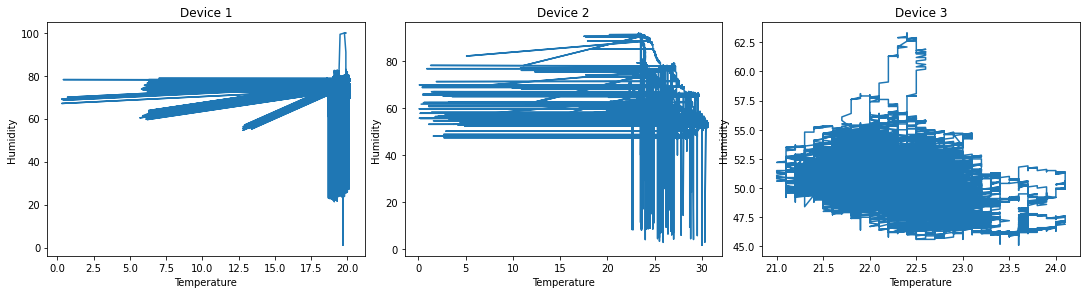

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

axes[0].plot(df_1.Temperature, df_1.Humidity)
axes[0].set_title('Device 1')

axes[1].plot(df_2.Temperature, df_2.Humidity)
axes[1].set_title('Device 2')

axes[2].plot(df_3.Temperature, df_3.Humidity)
axes[2].set_title('Device 3')

fig.tight_layout()

for ax in axes.flat:
    ax.set(ylabel='Humidity', xlabel='Temperature')

In [28]:
df_1.to_csv('df_1.csv', index=False)
df_2.to_csv('df_2.csv', index=False)
df_3.to_csv('df_3.csv', index=False)

In [29]:
df['Motion'].value_counts()

False    404702
True        482
Name: Motion, dtype: int64